<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Projeto_Pre%C3%A7o_Bolsa_Valores_Petrobas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Download base
[link text](https://br.financas.yahoo.com/quote/PETR4.SA/history?period1=1356998400&period2=1517356800&interval=1d&filter=history&frequency=1d)

Treino até Dezembro 2017

Teste Inicio de Janeiro ao Final de Janeiro

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
base = pd.read_csv('/content/sample_data/petr4_treinamento.csv')
base = base.dropna()#dropa valores nulos
base_treinamento = base.iloc[:, 1:2].values #pega somento o valor ontem no caso preço de abertura

normalizador = MinMaxScaler(feature_range = (0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)# deixa a base de treinamento normalizada entre 0 e 1

In [0]:
previsores = []
preco_real = []
for i in range(90, 1242):
  previsores.append(base_treinamento_normalizada[i - 90: i, 0])
  preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [7]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))#return_sequences passa a informacao para as proxima camada LSTM
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])#adam tambem server porem para redes recorrentes o rmsprop pode trazer melhores resultados
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1152/1152 [==============================] - 15s 13ms/step - loss: 0.0333 - mean_absolute_error: 0.1358
Epoch 2/100
1152/1152 [==============================] - 12s 11ms/step - loss: 0.0154 - mean_absolute_error: 0.0968
Epoch 3/100
1152/1152 [==============================] - 12s 11ms/step - loss: 0.0129 - mean_absolute_error: 0.0867
Epoch 4/100
1152/1152 [==============================] - 12s 11ms/step - loss: 0.0122 - mean_absolute_error: 0.0843
Epoch 5/100
1152/1152 [==============================] - 12s 11ms/step - loss: 0.0092 - mean_absolute_error: 0.0735
Epoch 6/100
1152/1152 [==============================] - 12s 11ms/step - loss: 0.0090 - mean_absolute_error: 0.0722
Epoch 7/100
1152/1152 [==============================] - 13s 11ms/step - loss: 0.0

In [0]:
base_teste = pd.read_csv('/content/sample_data/petr4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)#concatena 2 arquivos, axis =0 indica que isto e feito por coluna
entradas = base_completa[len(base_completa) - len(base_teste)- 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

In [14]:
X_teste = []
for i in range(90, 112):
  X_teste.append(entradas[i-90: i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
previsores = regressor.predict(X_teste)
previsores = normalizador.inverse_transform(previsores)# desnormaliza os dados
for i in range(len(previsores)):
  print(previsores[i], preco_real_teste[i])
print("Diferença Media: " , previsores.mean() - preco_real_teste.mean())

[16.252272] [16.190001]
[16.315222] [16.49]
[16.552011] [16.780001]
[16.867413] [16.700001]
[16.925417] [16.74]
[16.927649] [17.030001]
[17.139128] [16.92]
[17.180275] [16.879999]
[17.128109] [17.040001]
[17.216932] [17.32]
[17.474419] [17.35]
[17.600628] [17.92]
[18.011143] [18.35]
[18.505003] [18.309999]
[18.623789] [18.26]
[18.567133] [18.4]
[18.652071] [18.42]
[18.73328] [19.34]
[19.425896] [19.620001]
[19.918339] [19.67]
[20.022959] [19.77]
[20.08472] [19.74]
Diferença Media:  0.04017299156604892


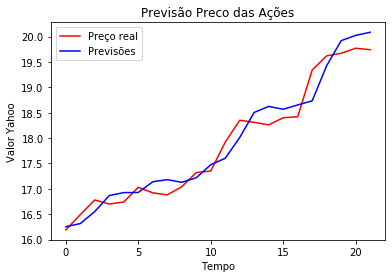

In [17]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsores, color = 'blue', label = 'Previsões')
plt.title('Previsão Preco das Ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()